In [ ]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
!pip install neattext
import neattext as ntx

     |████████████████████████████████| 114 kB 5.0 MB/s 


In [ ]:


!kaggle datasets download -d gpreda/all-covid19-vaccines-tweets

all-covid19-vaccines-tweets.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! unzip /content/all-covid19-vaccines-tweets.zip

Archive:  /content/all-covid19-vaccines-tweets.zip
  inflating: vaccination_all_tweets.csv  


In [ ]:
path='/content/vaccination_all_tweets.csv'
data = pd.read_csv(path)

In [ ]:
data.head()

id             user_name  ... favorites is_retweet
0  1340539111971516416            Rachel Roh  ...         0      False
1  1338158543359250433           Albert Fong  ...         1      False
2  1337858199140118533              eli🇱🇹🇪🇺👌  ...         0      False
3  1337855739918835717         Charles Adler  ...      2129      False
4  1337854064604966912  Citizen News Channel  ...         0      False

[5 rows x 16 columns]

In [ ]:
data.shape

(165277, 16)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165277 entries, 0 to 165276
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                165277 non-null  int64 
 1   user_name         165276 non-null  object
 2   user_location     112515 non-null  object
 3   user_description  153812 non-null  object
 4   user_created      165277 non-null  object
 5   user_followers    165277 non-null  int64 
 6   user_friends      165277 non-null  int64 
 7   user_favourites   165277 non-null  int64 
 8   user_verified     165277 non-null  bool  
 9   date              165277 non-null  object
 10  text              165277 non-null  object
 11  hashtags          133081 non-null  object
 12  source            165158 non-null  object
 13  retweets          165277 non-null  int64 
 14  favorites         165277 non-null  int64 
 15  is_retweet        165277 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory

In [ ]:
data.isna().sum()

id                      0
user_name               1
user_location       52762
user_description    11465
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            32196
source                119
retweets                0
favorites               0
is_retweet              0
dtype: int64

In [ ]:
data['date'] = pd.to_datetime(data['date']).dt.date
data.head()

id             user_name  ... favorites is_retweet
0  1340539111971516416            Rachel Roh  ...         0      False
1  1338158543359250433           Albert Fong  ...         1      False
2  1337858199140118533              eli🇱🇹🇪🇺👌  ...         0      False
3  1337855739918835717         Charles Adler  ...      2129      False
4  1337854064604966912  Citizen News Channel  ...         0      False

[5 rows x 16 columns]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

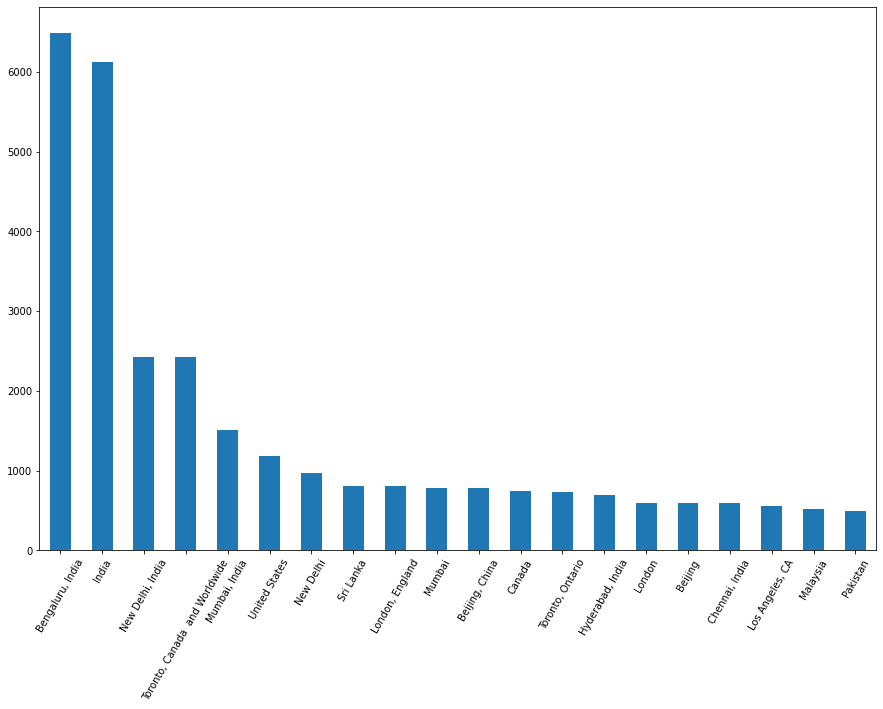

In [ ]:
plt.figure(figsize=(15,10))
data['user_location'].value_counts().nlargest(20).plot(kind='bar')
plt.xticks(rotation=60)

In [ ]:
data=data.drop_duplicates('text')
data.shape

(163600, 16)

In [ ]:
data.is_retweet.unique()

array([False])

In [ ]:
data.source.value_counts()

Twitter for Android               43095
Twitter Web App                   42155
Twitter for iPhone                36285
cowin_vaccine_app                 10203
Cowin Vaccination Availability     8525
                                  ...  
CarpoolWorld Feed                     1
Social Reputation                     1
Twitter for  iPhone                   1
Linky for iOS                         1
Zazoom Ultima ora                     1
Name: source, Length: 311, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

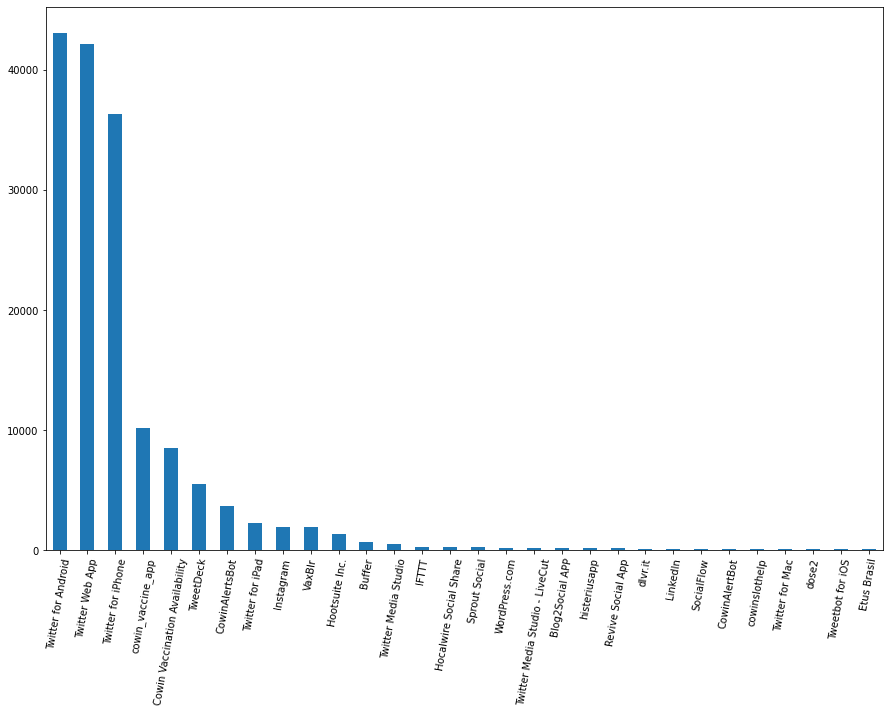

In [ ]:
plt.figure(figsize=(15,10))
data['source'].value_counts().nlargest(30).plot(kind='bar')
plt.xticks(rotation=80)

In [ ]:
len(data['date'].unique())

220

In [ ]:
data.user_location.value_counts()

Bengaluru, India                  6490
India                             6110
Toronto, Canada  and Worldwide    2418
New Delhi, India                  2414
Mumbai, India                     1508
                                  ... 
Boston, MA/ WorldWide                1
Blacksburg VA USA                    1
Quezon City , Philippines            1
Moncton, NB, Canada                  1
München, Heidelberg                  1
Name: user_location, Length: 20997, dtype: int64

In [ ]:
data.sort_values(by=['date'], ascending=[False]).head(2)

id user_name  ... favorites is_retweet
161863  1426030767272906754    VaxBLR  ...         0      False
158278  1426073312577277952    Jasmin  ...         0      False

[2 rows x 16 columns]

In [ ]:
data.drop(columns={"id","user_name","user_description","user_created","user_followers",\
                   "user_friends","user_favourites","user_verified","hashtags","source","retweets","favorites","is_retweet"},inplace=True)

In [ ]:
pd.set_option('display.max_colwidth', 700)
data.head()

user_location  ...                                                                                                                                          text
0  La Crescenta-Montrose, CA  ...                                             Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF
1          San Francisco, CA  ...  While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm
2                   Your Bed  ...  #coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P
3     Vancouver, BC - Canada  ...  Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4
4                        NaN  ...       Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq

[5 rows x 3 columns]

In [ ]:
data['clean_data']=data['text'].apply(ntx.remove_hashtags)
data['clean_data']=data['clean_data'].apply(ntx.remove_urls)
data['clean_data']=data['clean_data'].apply(ntx.remove_userhandles)
data['clean_data']=data['clean_data'].apply(ntx.remove_multiple_spaces)
data['clean_data']=data['clean_data'].apply(ntx.remove_special_characters)

In [ ]:
data[['clean_data','text']].head()

clean_data                                                                                                                                          text
0                                                         Same folks said daikon paste could treat a cytokine storm                                              Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF
1  While the world has been on the wrong side of history this year hopefully the biggest vaccination effort weve ev   While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm
2                                                                       Russian vaccine is created to last 24 years   #coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P
3     Facts are immutable Senator even when youre not ethically sturdy enough to acknowledge them 1 You were born i   Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4
4                                                                         Explain to me again why we need a vaccine        Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq

In [ ]:
data.head()

user_location  ...                                                                                                         clean_data
0  La Crescenta-Montrose, CA  ...                                                         Same folks said daikon paste could treat a cytokine storm 
1          San Francisco, CA  ...  While the world has been on the wrong side of history this year hopefully the biggest vaccination effort weve ev 
2                   Your Bed  ...                                                                       Russian vaccine is created to last 24 years 
3     Vancouver, BC - Canada  ...     Facts are immutable Senator even when youre not ethically sturdy enough to acknowledge them 1 You were born i 
4                        NaN  ...                                                                         Explain to me again why we need a vaccine 

[5 rows x 4 columns]

## TEXTBLOB

In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

lemmatizer = WordNetLemmatizer()
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
stop_words = stopwords.words('english')
len(stop_words),stop_words[5:10]

(179, ['our', 'ours', 'ourselves', 'you', "you're"])

In [ ]:
def stopWords(tweet):
  clean_tweet = tweet
  clean_tweet = " ".join(word for word in clean_tweet.split() if word not in stop_words)
# clean_tweet = " ".join(lemmatizer.lemmatize(word) for word in clean_tweet.split())
  return clean_tweet

In [ ]:
data['clean_data'] = data['clean_data'].apply(lambda x: stopWords(x))

In [ ]:
data.head(2)

user_location  ...                                                                        clean_data
0  La Crescenta-Montrose, CA  ...                           Same folks said daikon paste could treat cytokine storm
1          San Francisco, CA  ...  While world wrong side history year hopefully biggest vaccination effort weve ev

[2 rows x 4 columns]

In [ ]:
from textblob import TextBlob

def blob_fun(text):
  senti = TextBlob(text)
  senti_polarity = senti.sentiment.polarity
  senti_subjectivity = senti.sentiment.subjectivity

  if senti_polarity > 0:
    res = 'Positive'

  elif senti_polarity < 0:
    res = 'Negative'

  elif senti_polarity == 0:
    res ="Neutral"

  result = {'polarity':senti_polarity,'subjectivity':senti_subjectivity,'sentiment':res}

  return result

In [ ]:
blob_fun('thank god,i tested negative for covid')

{'polarity': -0.3, 'sentiment': 'Negative', 'subjectivity': 0.4}

In [ ]:
blob_fun(data['clean_data'][5])

{'polarity': 0.4, 'sentiment': 'Positive', 'subjectivity': 0.25}

In [ ]:
data['results'] = data['clean_data'].apply(blob_fun)

In [ ]:
data.drop(columns={"user_location",'text'},inplace=True)

In [ ]:
data.head(2)

date  ...                                                           results
0  2020-12-20  ...  {'polarity': 0.0, 'subjectivity': 0.125, 'sentiment': 'Neutral'}
1  2020-12-13  ...  {'polarity': -0.5, 'subjectivity': 0.9, 'sentiment': 'Negative'}

[2 rows x 3 columns]

In [ ]:
data = data.join(pd.json_normalize(data=data['results']))

In [ ]:

data.head()

date  ... sentiment
0  2020-12-20  ...   Neutral
1  2020-12-13  ...  Negative
2  2020-12-12  ...   Neutral
3  2020-12-12  ...  Positive
4  2020-12-12  ...   Neutral

[5 rows x 6 columns]

In [ ]:
positive_tweet =  data[data['sentiment'] == 'Positive']['clean_data']
negative_tweet =  data[data['sentiment'] == 'Negative']['clean_data']
neutral_tweet =  data[data['sentiment'] == 'Neutral']['clean_data']

In [ ]:

from wordcloud import WordCloud
def cloud_of_Words(tweet_cat,title):
    forcloud = ' '.join([tweet for tweet in tweet_cat])
    wordcloud = WordCloud(width =500,height = 300,random_state =5,max_font_size=110).generate(forcloud)
    plt.imshow(wordcloud, interpolation ='bilinear')
    plt.title(title)
    plt.axis('off')
    plt.show()
    plt.figure(figsize = (10,8))


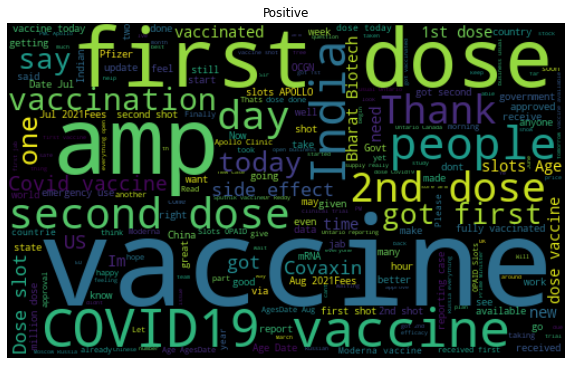

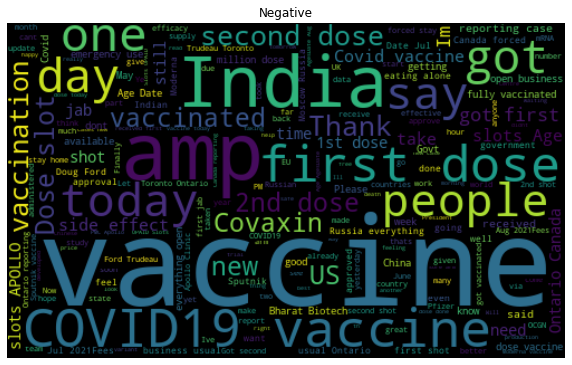

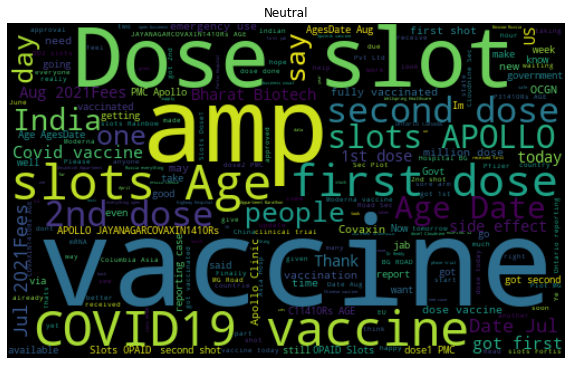

<Figure size 720x576 with 0 Axes>

In [ ]:
plt.figure(figsize = (10,8))
cloud_of_Words(positive_tweet, 'Positive')
cloud_of_Words(negative_tweet, 'Negative')
cloud_of_Words(neutral_tweet, 'Neutral')

In [ ]:
positive_tokens = [token for line in positive_tweet for token in line.split()]
negative_tokens = [token for line in negative_tweet for token in line.split()]
neutral_tokens = [token for line in neutral_tweet for token in line.split()]

In [ ]:
from collections import Counter
def get_maxtoken(tweets,num=30):
  word_tokens = Counter(tweets)
  max_common = word_tokens.most_common(num)
  return dict(max_common)

In [ ]:
def token_df_vis(x, title):
  df = pd.DataFrame(get_maxtoken(x).items(),columns=['words','count'])
  # plt.figure(figsize = (20,5))
  # plt.title(title)
  # plt.xticks(rotation=45)
  fig = px.bar(df,x='words',y='count',title = title)
  fig.show()


In [ ]:
token_df_vis(positive_tokens,'Positive')
token_df_vis(negative_tokens,'Negative')
token_df_vis(neutral_tokens,'Neutral')

In [ ]:
fig = px.scatter(data,x='polarity',y='subjectivity')
fig.show()

In [ ]:
def percent(x,y):
  return print("Percentage of "+y+" tweets :",round(len(x)/data.shape[0]*100,3),"%")

In [ ]:
percent(positive_tweet, 'positive')
percent(negative_tweet, 'negative')
percent(neutral_tweet, 'neutral')

Percentage of positive tweets : 31.774 %
Percentage of negative tweets : 10.207 %
Percentage of neutral tweets : 56.994 %


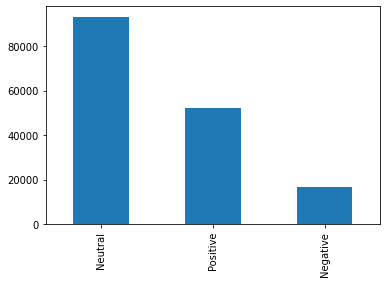

In [ ]:
data['sentiment'].value_counts().plot(kind='bar')

## Going Deeper

In [ ]:
data.columns

Index(['date', 'clean_data', 'results', 'polarity', 'subjectivity',
       'sentiment'],
      dtype='object')

In [ ]:
deep = data.drop(columns="results")

In [ ]:
deep.head(2)

date  ... sentiment
0  2020-12-20  ...   Neutral
1  2020-12-13  ...  Negative

[2 rows x 5 columns]

In [ ]:
pfizer_refs = ["Pfizer","pfizer","Pfizer–BioNTech","pfizer-bioNtech","BioNTech","biontech"]
bbiotech_refs = ["covax","covaxin","Covax","Covaxin","Bharat Biotech","bharat biotech","BharatBiotech","bharatbiotech"]
sputnik_refs = ["russia","sputnik","Sputnik","V"]
sii_refs = ['sii','SII','adar poonawalla','Covishield','covishield','astra','zenca','Oxford–AstraZeneca','astrazenca','oxford-astrazenca','serum institiute']
moderna_refs = ['moderna','Moderna','mRNA-1273','Spikevax']

In [ ]:
def refer(tweet, refs):
  flag =0
  for ref in refs:
    if tweet.find(ref) != -1:
      flag =1
  return flag

deep['pfizer'] = deep['clean_data'].apply(lambda x : refer(x, pfizer_refs))
deep['bbiotech'] = deep['clean_data'].apply(lambda x : refer(x, bbiotech_refs))
deep['sputnik'] = deep['clean_data'].apply(lambda x : refer(x, sputnik_refs))
deep['sii'] = deep['clean_data'].apply(lambda x : refer(x, sii_refs))
deep['moderna'] = deep['clean_data'].apply(lambda x : refer(x, moderna_refs))

In [ ]:
display(deep.pfizer.value_counts(),deep.bbiotech.value_counts(),deep.sputnik.value_counts(),deep.sii.value_counts(),deep.moderna.value_counts())

0    161058
1      2542
Name: pfizer, dtype: int64

0    158625
1      4975
Name: bbiotech, dtype: int64

0    132315
1     31285
Name: sputnik, dtype: int64

0    162668
1       932
Name: sii, dtype: int64

0    158996
1      4604
Name: moderna, dtype: int64

In [ ]:
deep[deep['bbiotech']==1].head()

date  ... moderna
1592  2020-12-26  ...       0
2202  2021-01-03  ...       0
2383  2021-01-05  ...       0
4138  2021-01-21  ...       1
5399  2021-02-07  ...       0

[5 rows x 10 columns]

In [ ]:
deep[deep['pfizer']==1].head()

date  ... moderna
23  2020-12-12  ...       0
66  2020-12-14  ...       0
88  2020-12-14  ...       0
94  2020-12-14  ...       0
98  2020-12-14  ...       0

[5 rows x 10 columns]

In [ ]:
def stats(a,b,c,d,e):
  for i in a,b,c,d,e:
     display(deep[deep[i]==1][[i,'polarity','subjectivity']].groupby(i).agg([np.mean,np.max,np.min,np.median]))

In [ ]:
stats('pfizer','bbiotech','sputnik','sii','moderna')

polarity                  subjectivity                 
            mean amax amin median         mean amax amin median
pfizer                                                         
1       0.086587  1.0 -1.0    0.0     0.235835  1.0  0.0   0.05

polarity                  subjectivity                 
              mean amax amin median         mean amax amin median
bbiotech                                                         
1         0.080935  1.0 -1.0    0.0      0.21565  1.0  0.0    0.0

polarity                  subjectivity                 
             mean amax amin median         mean amax amin median
sputnik                                                         
1        0.071721  1.0 -1.0    0.0     0.212271  1.0  0.0    0.0

polarity                  subjectivity                 
         mean amax amin median         mean amax amin median
sii                                                         
1    0.079108  1.0 -1.0    0.0     0.213296  1.0  0.0    0.0

polarity                  subjectivity                 
             mean amax amin median         mean amax amin median
moderna                                                         
1        0.087758  1.0 -0.9    0.0     0.247722  1.0  0.0    0.1

In [ ]:
pfizer = deep[deep['pfizer']==1][['date','polarity']]
bbiotech = deep[deep['bbiotech']==1][['date','polarity']]
sputnik = deep[deep['sputnik']==1][['date','polarity']]
sii = deep[deep['sii']==1][['date','polarity']]
moderna = deep[deep['moderna']==1][['date','polarity']]

pfizer = pfizer.sort_values(by='date',ascending=True)
bbiotech = bbiotech.sort_values(by='date',ascending=True)
sputnik = sputnik.sort_values(by='date',ascending=True)
sii = sii.sort_values(by='date',ascending=True)
moderna = moderna.sort_values(by='date',ascending=True)

pfizer['Avg Polarity'] = pfizer.polarity.rolling(20, min_periods=3).mean()
bbiotech['Avg Polarity'] = bbiotech.polarity.rolling(20, min_periods=3).mean()
sputnik['Avg Polarity'] = sputnik.polarity.rolling(20, min_periods=3).mean()
sii['Avg Polarity'] = sii.polarity.rolling(5, min_periods=3).mean()
moderna['Avg Polarity'] = moderna.polarity.rolling(20, min_periods=3).mean()

In [ ]:
bbiotech.head(10)

date  polarity  Avg Polarity
1592  2020-12-26  0.000000           NaN
2202  2021-01-03  0.000000           NaN
2383  2021-01-05  0.500000      0.166667
4138  2021-01-21  0.227273      0.181818
5399  2021-02-07  0.000000      0.145455
5401  2021-02-07  0.300000      0.171212
5629  2021-02-07  0.500000      0.218182
5630  2021-02-07  0.000000      0.190909
5840  2021-02-08  0.800000      0.258586
6068  2021-02-08  0.000000      0.232727

In [ ]:
a,b,c,d,e = pfizer,bbiotech,sputnik,sii,moderna
fig = px.line(a, x="date", y="Avg Polarity", title='Pfizer')
fig.show()
fig = px.line(b, x="date", y="Avg Polarity", title='Bharat Biotech')
fig.show()
fig = px.line(c, x="date", y="Avg Polarity", title='Sputnik')
fig.show()
fig = px.line(d, x="date", y="Avg Polarity", title='SII')
fig.show()
fig = px.line(e, x="date", y="Avg Polarity", title='Moderna')
fig.show()